In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# 1. Завантаження датасету
data = fetch_california_housing(as_frame=True)
data = data.frame


In [12]:
# Виведення перших 5 рядків
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [13]:
#Перевіряємо наявність пропусків
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [14]:
#Перевіряємо наявність дублікатів
data.duplicated().sum()

0

In [15]:
#Перевіряємо типи даних
data.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [16]:
# 3. Масштабування ознак
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(columns="MedHouseVal"))
y = data["MedHouseVal"]


In [17]:
# 4. Поділ на тренувальні і тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# 5. Побудова моделей та GridSearchCV

# Лінійна регресія
lr = LinearRegression()

# RandomForest
rf = RandomForestRegressor(random_state=42)
param_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20]}

# Ridge регресія
ridge = Ridge()
param_ridge = {'alpha': [1.0, 10.0, 100.0]}

# Пошук найкращих параметрів для кожної моделі
grid_rf = GridSearchCV(rf, param_rf, cv=5)
grid_ridge = GridSearchCV(ridge, param_ridge, cv=5)

# Тренування моделей
lr.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_ridge.fit(X_train, y_train)

# Прогнозування на тестовому наборі
y_pred_lr = lr.predict(X_test)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
y_pred_ridge = grid_ridge.best_estimator_.predict(X_test)

In [19]:
# 6. Оцінка моделей (R² та MSE)
models = {'Linear Regression': (y_pred_lr, lr),
          'Random Forest': (y_pred_rf, grid_rf),
          'Ridge Regression': (y_pred_ridge, grid_ridge)}

for name, (y_pred, model) in models.items():
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} - R²: {r2:.4f}, MSE: {mse:.4f}')

Linear Regression - R²: 0.5758, MSE: 0.5559
Random Forest - R²: 0.8056, MSE: 0.2547
Ridge Regression - R²: 0.5758, MSE: 0.5559


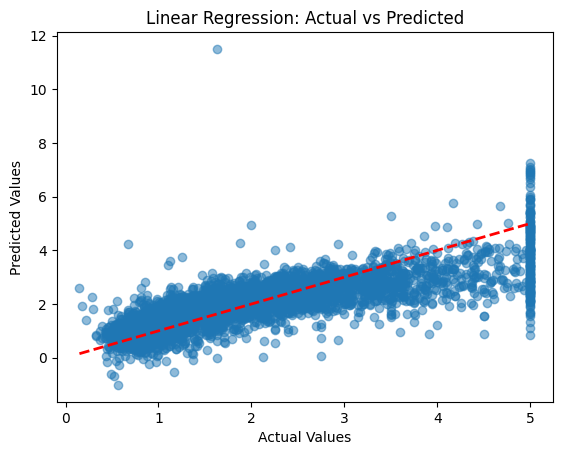

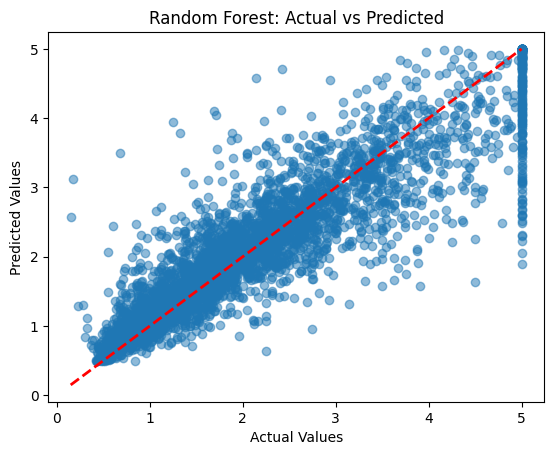

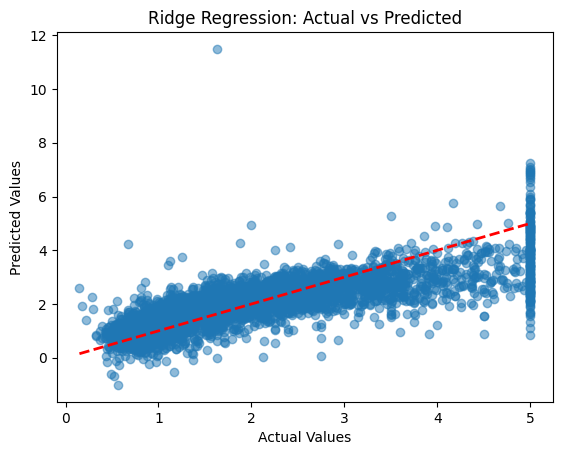

In [20]:
# Побудова графіків
for name, (y_pred, _) in models.items():
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name}: Actual vs Predicted')
    plt.show()

Згідно з результатами, модель Random Forest показує найкращі показники: вона має найвище значення R² (0.8056), що свідчить про високу точність прогнозів, і найнижче значення MSE (0.2547), що вказує на меншу середню помилку. Лінійна регресія та Ridge регресія мають однакові результати, але вони значно гірші (R²: 0.5758, MSE: 0.5559), що означає, що вони менш точні і мають більші помилки порівняно з Random Forest. Отже, Random Forest є найбільш ефективною моделлю серед розглянутих.